Data Description:  

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

Context: 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. 

In [55]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Read the dataset and display the shape of the data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loan_df.shape

(5000, 14)

In [9]:
# Check the data 
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
# Analyzing a correlation between the attributes and spread of the data.
loan_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [15]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


([<matplotlib.axis.YTick at 0x17d6e504550>,
 <a list of 14 Text yticklabel objects>)

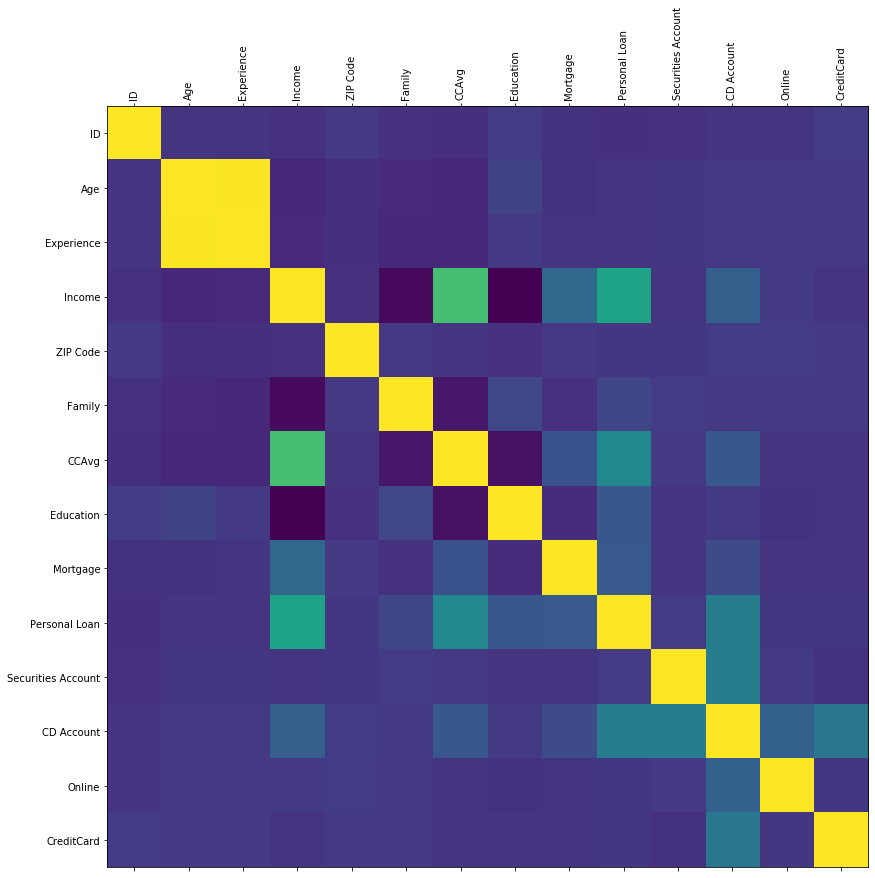

In [20]:
# Plotting the correlation plot to understand the distribution of the data
corr_matrix = pd.DataFrame(loan_df.corr())
fig, ax = plt.subplots(figsize = (corr_matrix.count(axis = 1)[0], (corr_matrix.count(axis = 1)[0])))
ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation = '90')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# from below plot we can see that Age and Experience are higly correlated, and various other are correlated in some way
# but the ID is not at all correlated Zip Code and ID' are not at all correlated
# so we remove these attributes going forward which are least correlated because these are bad for prediction or have no effect.

0    4520
1     480
Name: Personal Loan, dtype: int64

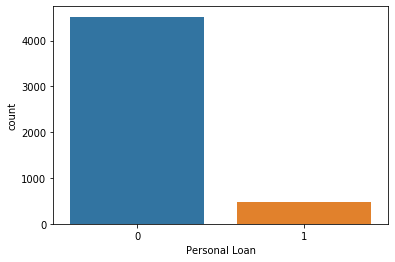

In [26]:
# Lets plot the distribution of the target variable which is Personal loan and understand the distribution
sns.distplot(loan_df['Personal Loan'], kde = False)
sns.countplot(loan_df['Personal Loan'])
loan_df['Personal Loan'].value_counts()
# so the approx 90% of the people do not go with the loan
# only 10% people go with the loan provided by the bank

In [57]:
# defining X and y variable for model building
X = loan_df.drop(['Personal Loan', 'ID'], axis = 1)
y = loan_df['Personal Loan']

In [62]:
# Splitting the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
X_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [63]:
# apply the standard scaler for higly varying magnitude attrubutes
# without feature scaling we achieved the 90% accuracy
# with feture scaling we acheived 94% accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [64]:
X_train

array([[ 0.13597665,  0.15613728, -0.83705838, ..., -0.25835623,
         0.83164805, -0.650648  ],
       [-0.64621189, -0.53857809, -0.75040637, ..., -0.25835623,
         0.83164805, -0.650648  ],
       [ 1.1788947 ,  1.28504976,  1.24258976, ..., -0.25835623,
         0.83164805,  1.53692933],
       ...,
       [ 0.04906681,  0.15613728, -0.98869939, ..., -0.25835623,
         0.83164805,  1.53692933],
       [ 0.04906681,  0.15613728,  0.3327437 , ..., -0.25835623,
         0.83164805, -0.650648  ],
       [-0.64621189, -1.05961462, -0.05719032, ..., -0.25835623,
         0.83164805, -0.650648  ]])

In [65]:
# As some of attributes are less correlated. 
# We remove some attributes which are not good with predicting data.
# Performing backward elimination method to remove some attributes
#  which are not useful for predicting.
# By using backward elimination method to eliminate these attributes.
# using statsmodel regressor to get the pvalues by fitting the training set.
import statsmodels.api as sm
regressor = sm.OLS(y_train, X_train).fit()

# choosing significance level at 5% as this model is not too critical for us.
rejected_features = []
for index in range(len(regressor.pvalues)):
    if regressor.pvalues[index] > 0.05:
        rejected_features.append(index)
        
rejected_features


[0, 1, 3]

In [66]:
# we got columns 0, 1, 3 pvalues > 0.05 
# remove the fearures selected from the backword eliminatation method
X_train = pd.DataFrame(X_train).drop(rejected_features, axis = 1)
X_test = pd.DataFrame(X_test).drop(rejected_features, axis = 1)
# Add the columns headers back to training set and test set
X_train.columns = np.delete(cols, rejected_features)
X_test.columns = np.delete(cols, rejected_features)

In [116]:
# Now we start training all the models
# Training logistice regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# check the accuracy of logistic regression model with training and test data
[classifier.score(X_train, y_train),
classifier.score(X_test, y_test)]

[0.9522857142857143, 0.9473333333333334]

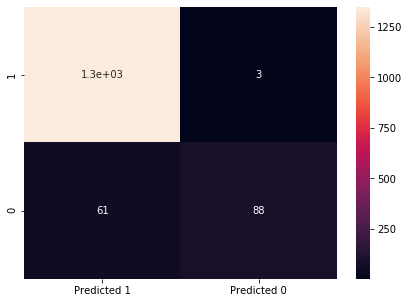

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['1', '0'],
                         columns = ['Predicted 1', 'Predicted 0'])
plt.figure(figsize = (7, 5))
sns.heatmap(df_cm, annot = True)


In [78]:
# Train the model using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []
for i in range(1, 20):
    knnclassifier = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'euclidean')
    knnclassifier.fit(X_train, y_train)
    y_pred = knnclassifier.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

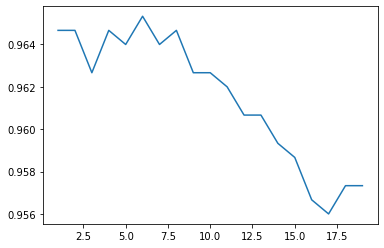

In [79]:
# lets plot the KNeighborsClassifier score's and understand for which "k" value the score is high.
plt.plot(range(1, 20), scores)
# so the conclusion is neghbors selection should be between 0 to 7 to perform good accuracy of the model

In [110]:
# get the "k" value that has highest accuracy score
k = [ix for ix in range(len(scores)) if scores[ix] == np.max(scores)]
k

[5]

In [125]:
# lets build the model with neigbors = 5
knnclassifier = KNeighborsClassifier(n_neighbors = i, weights = 'distance', metric = 'euclidean')
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)
[accuracy_score(y_test, y_pred)]

[0.9573333333333334]

In [126]:
from sklearn.naive_bayes import BernoulliNB
BernoNB = BernoulliNB()
BernoNB.fit(X_train, y_train)
y_pred = BernoNB.predict(X_test)

In [127]:
# find the accuracy of Naive-Bayes 
[accuracy_score(y_test, y_pred)]

[0.9106666666666666]

The dataset is being tested with 3 models i,e. LogisticRegression, KNeighborsClassifier and NaiveBayes
Logistic regression predicted with accuracy of 94.7%
KNeighborsClassifier predicted with accuracy of 95.7%
NavieBayes predicted with accuracy of 91%.
we can choose KNN classifier with 95.7% accuracy after feature selection and scaling the attributes